# Data Analysis of Covid - 19 (Capstone Project)

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#

## 1. Import the data set using Pandas from the given URL.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## 2. High Level Data Understanding

### a. Find no. of rows and columns in the data set

In [4]:
df.shape

(57394, 49)

### b. Data types of columns

In [9]:
df.dtypes

,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
new_cases,float64
new_cases_smoothed,float64
total_deaths,float64
new_deaths,float64
new_deaths_smoothed,float64


### c. Info and describe of data in dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

## 3. Low Level Data Understanding

### a. Find count of unique values in location column

In [11]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

### b. Find which continent has maximum frequency using value counts

In [12]:
df['continent'].value_counts()

,count
continent,
Europe,14828
Africa,13637
Asia,13528
North America,9116
South America,3404
Oceania,2235


### c. Find maximum and mean value of total cases

In [13]:
df['total_cases'].max()

55154651.0

In [14]:
df['total_cases'].mean()

167797.3688753302

### d. Find 25%, 50% and 75% quartile value of total deaths

In [15]:
df['total_deaths'].quantile([0.25, 0.50, 0.75])

,total_deaths
0.25,13.0
0.50,84.0
0.75,727.0


### e. Find which continent has maximum human development index

In [17]:
df.groupby('continent').agg({'human_development_index': 'max'})[:1]

,human_development_index
continent,
Africa,0.797


### f. Find which continent has minimum GDP per capita

In [21]:
df.groupby('continent').agg({'gdp_per_capita': 'min'})[:1]

,gdp_per_capita
continent,
Africa,661.24


## 4. Filter the dataframe with only these columns ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index'] and update the dataframe

In [22]:
df = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


## 5. Data Cleaning

### a. Remove all duplicate observations

In [26]:
df.duplicated().sum()

0

In [25]:
df.drop_duplicates(inplace=True)

### b. Find missing values in all columns

In [28]:
df.isna().sum()

,0
continent,646
location,0
date,0
total_cases,3636
total_deaths,13026
gdp_per_capita,7027
human_development_index,8147


### c. Remove all observations where continent column value is missing (Tip: using `subset` parameter in `dropna`)

In [34]:
df['continent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 57394 entries, 0 to 57393
Series name: continent
Non-Null Count  Dtype 
--------------  ----- 
56748 non-null  object
dtypes: object(1)
memory usage: 448.5+ KB


In [36]:
df.dropna(subset=['continent'])

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


### d. Fill all missing values with 0

In [37]:
df = df.fillna(0)
df.isna().sum()

,0
continent,0
location,0
date,0
total_cases,0
total_deaths,0
gdp_per_capita,0
human_development_index,0


## 6. Date Time Format

### a. Convert date column in datetime format using `pandas.to_datetime`

In [38]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

,0
continent,object
location,object
date,datetime64[ns]
total_cases,float64
total_deaths,float64
gdp_per_capita,float64
human_development_index,float64


### b. Create a new column month after extracting month data from date column

In [39]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


## 7. Data Aggregatiom

### a. Find max value in all columns using `groupby` function on continent column (Tip: use `reset_index()` after applying `groupby`)

In [40]:
df.groupby('continent').max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


### b. Store the result in a new dataframe named `'df_groupby'` (use `'df_groupby'` dataframe for all further analysis)

In [41]:
df_groupby = df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


## 8. Feature Engineering

### a. Create a new featute `'total_deaths_to_total_cases'` by ratio of `'total_deaths'` column to `'total_cases'`

In [42]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

In [44]:
df_groupby['total_deaths_to_total_cases'] * 100

,total_deaths_to_total_cases
0,2.408749
1,2.700364
2,1.470754
3,2.618830
4,2.206241
5,3.268468
6,2.825066


In [45]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12,0.024087
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


## 9. Data Visualization

### a. Perform univariate analysis on `'gdp_per_capita'` column by plotting histogram using seaborn dist plot

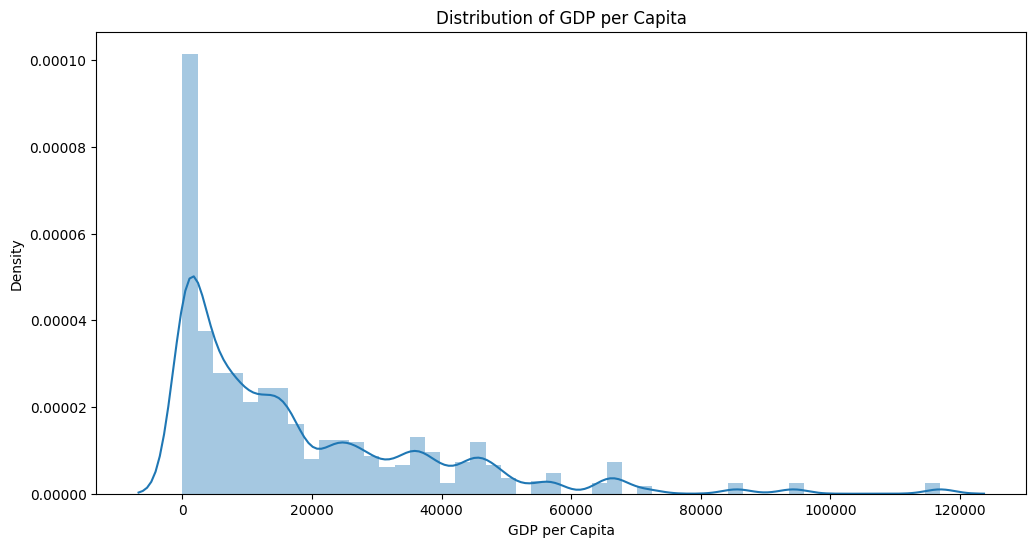

In [49]:
plt.figure(figsize=(12, 6))
sns.distplot(df['gdp_per_capita'])
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.show()

### b. Plot a scatter plot of `'total_cases'` and `'gdp_per_capita'`

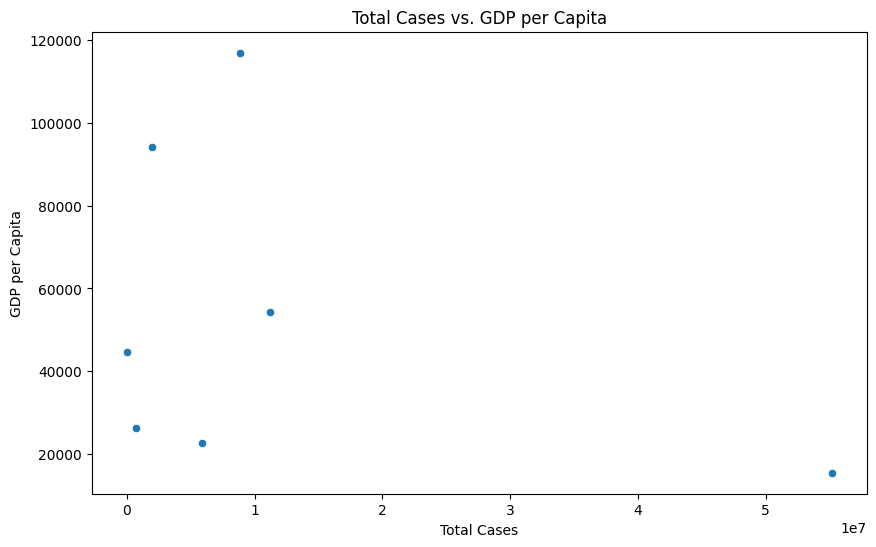

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_groupby, x='total_cases', y='gdp_per_capita')
plt.title('Total Cases vs. GDP per Capita')
plt.xlabel('Total Cases')
plt.ylabel('GDP per Capita')
plt.show()

### c. Plot pairplot on `df_groupby` data set

<Figure size 1200x600 with 0 Axes>

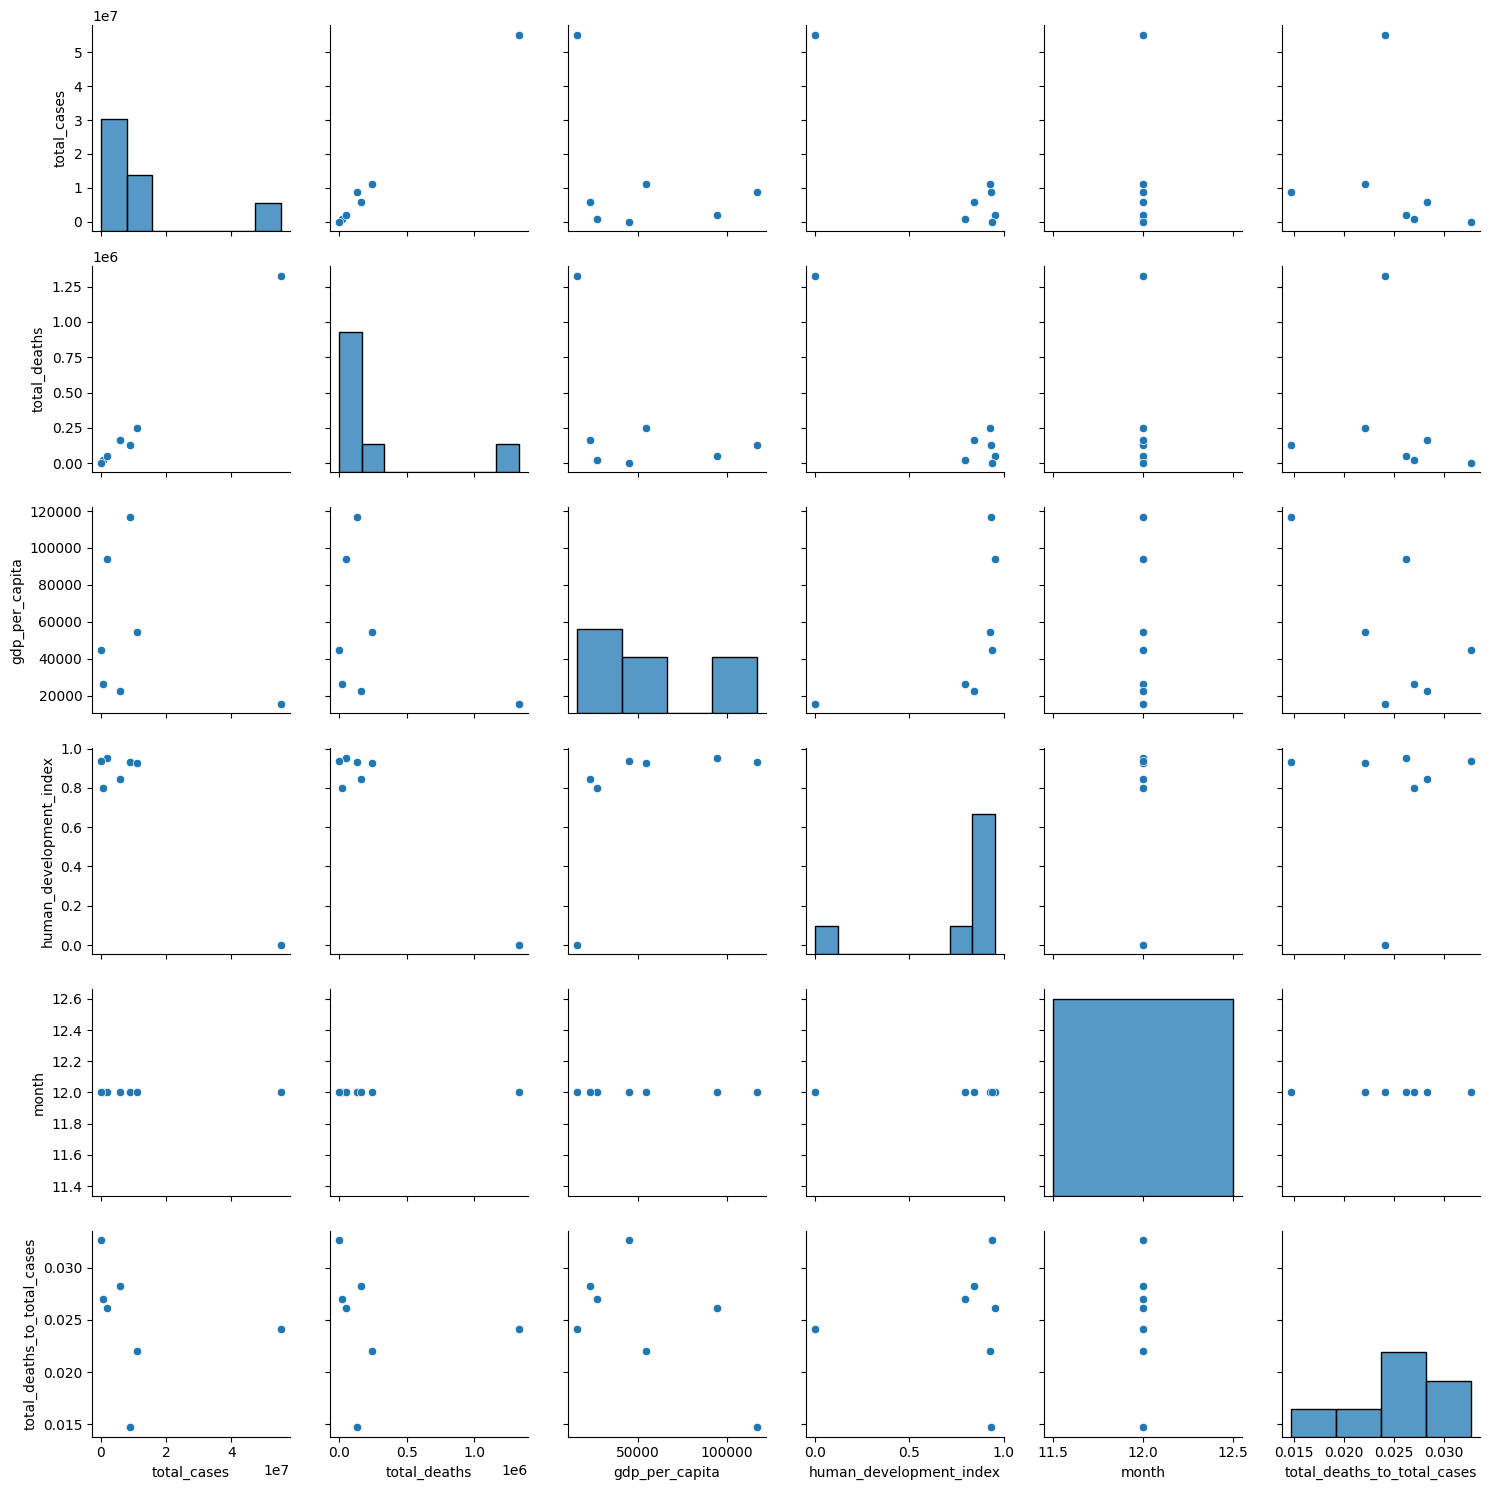

In [53]:
plt.figure(figsize=(12, 6))
sns.pairplot(df_groupby)
plt.tight_layout()
plt.show()

### d. Plot a bar plot of `'continent'` column with `'total_cases'` (Tip: using `kind='bar'` in seaborn catplot)

<Figure size 1200x600 with 0 Axes>

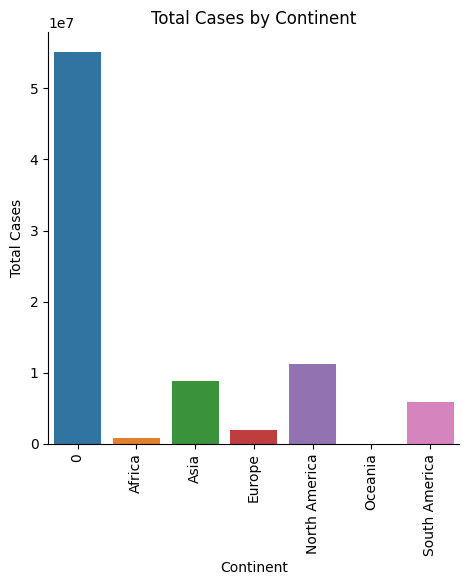

In [60]:
plt.figure(figsize=(12, 6))
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar', hue='continent', legend=False)
plt.title('Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.show()

## 10. Save the `df_groupby` dataframe in your local drive using `pandas.to_csv` function

In [61]:
df_groupby.to_csv('Covid_data.csv')